<a href="https://colab.research.google.com/github/kabeerbora/cs_ls/blob/main/cs_ls_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Upload Data


In [2]:
df_total = pd.read_excel('/content/drive/MyDrive/Bora-Sarangi/allstates_allvariables.xlsx', sheet_name = 'all_added')
df_total = df_total[df_total['ind_code'] == 'Total']
df_total['year'] = df_total['year'].astype(str).str.split('-').str[0]
df_total
df = pd.read_excel('/content/drive/MyDrive/Bora-Sarangi/price_indices.xlsx')

SyntaxError: invalid syntax (<ipython-input-2-f4b1cf3e52af>, line 1)

# Merge Data

In [ ]:
df_total['year'] = df_total['year'].astype(int)
df['year'] = df['year'].astype(int)
df_total = df_total.groupby('year', as_index=False).sum()
df = df.groupby('year', as_index=False).sum()
df_total
df_total = pd.merge(df_total, df, on='year', how='outer')

#Creating Variables

In [54]:
df_total['real_wage_cpi'] = (df_total['Wages and Salaries - Workers'] * 1000) / df['cpi_iw']
df_total['real_wage_wpi'] = (df_total['Wages and Salaries - Workers'] * 1000) / df['wpi']
df_total
df_total['avg_prod_cpi'] = (df_total['Net Value Added'] * 1000) / (df_total['Number of Workers'] * df_total['cpi_iw'])
df_total['avg_prod_wpi'] = (df_total['Net Value Added'] * 1000) / (df_total['Number of Workers'] * df_total['wpi'])
df_total['real_wage_worker_cpi'] = (df_total['real_wage_cpi']) / df_total['Number of Workers']
df_total['real_wage_worker_wpi'] = (df_total['real_wage_wpi']) / df_total['Number of Workers']
df_total['labor_share'] = df_total['Wages and Salaries - Workers'] / df_total['Net Value Added']
df_total['contract_share'] = df_total['Number of Workers - Employed Through Contractors'] / df_total['Number of Workers']
df_total['divergence'] = df_total['Wages and Salaries - Workers']/df_total['Net Value Added']

In [ ]:
### Creating delta variables
df_total['delta_ls_pct'] = df_total['labor_share'].pct_change() * 100
df_total['delta_cs_pct'] = df_total['contract_share'].pct_change() * 100

<ipython-input-5-8c04c18cb6f9>:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_total['delta_ls_pct'] = df_total['labor_share'].pct_change() * 100
<ipython-input-5-8c04c18cb6f9>:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_total['delta_cs_pct'] = df_total['contract_share'].pct_change() * 100


# Plotting variables

<Figure size 1200x600 with 0 Axes>

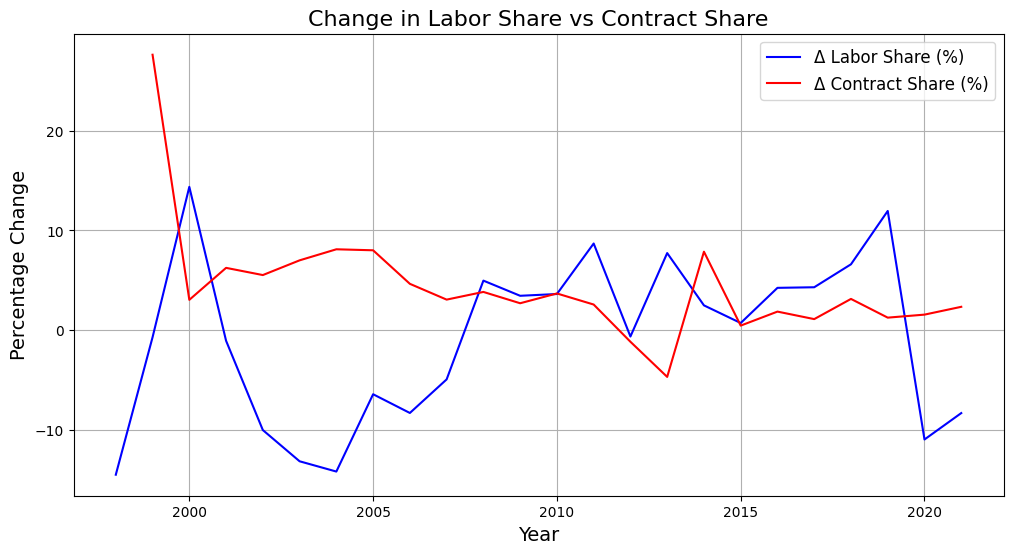

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_total is your DataFrame
df_plot = df_total[['year', 'delta_ls_pct', 'delta_cs_pct']].dropna()
df_plot = df_plot[(df_plot['delta_ls_pct'] != 0) & (df_plot['delta_cs_pct'] != 0)]

plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='delta_ls_pct', data=df_plot, label='Δ Labor Share (%)', color='blue')
sns.lineplot(x='year', y='delta_cs_pct', data=df_plot, label='Δ Contract Share (%)', color='red')

plt.title('Change in Labor Share vs Contract Share', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage Change', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

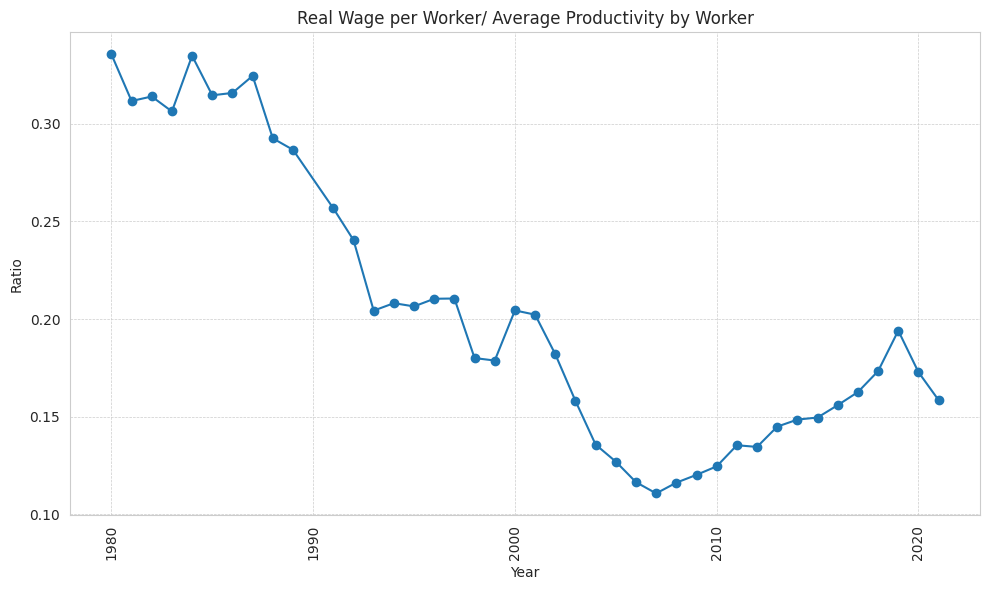

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_total is your DataFrame
df_plot = df_total[['year', 'divergence']].dropna()

plt.figure(figsize=(10, 6))
# Extract 'year' and 'divergence' columns as variables
year = df_plot['year']
divergence = df_plot['divergence']
plt.plot(year, divergence, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Real Wage per Worker/ Average Productivity by Worker')

# Add more gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # 'which' argument for major & minor grids

# Rotate x-axis labels for vertical orientation
plt.xticks(rotation='vertical')

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_total is your DataFrame
df_plot = df_total[['year', 'divergence', 'contract_share']].dropna()

# Filter data for divergence (1980 onwards)
df_divergence = df_plot[df_plot['year'] >= 1980]

# Filter data for contract_share (1998 onwards)
df_contract_share = df_plot[df_plot['year'] >= 1998]

plt.figure(figsize=(10, 6))

# Plot 'divergence'
plt.plot(df_divergence['year'], df_divergence['divergence'], marker='o', linestyle='-', label='Divergence')

# Plot 'contract_share'
plt.plot(df_contract_share['year'], df_contract_share['contract_share'], marker='x', linestyle='--', label='Contract Share')

plt.xlabel('Year')
plt.ylabel('Ratio / Share')  # Updated y-axis label
plt.title('Real Wage per Worker/ Average Productivity by Worker and Contract Share') # Updated title

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation='vertical')
plt.legend()  # Add a legend to distinguish the lines

plt.tight_layout()
plt.show()

TypeError: '>=' not supported between instances of 'str' and 'int'

# Sectoral Data


In [69]:
df_total = pd.read_excel('/content/drive/MyDrive/Bora-Sarangi/allstates_allvariables.xlsx', sheet_name = 'all_added')
df_total = df_total[df_total['ind_code'] != 'Total']
df_total['year'] = df_total['year'].astype(str).str.split('-').str[0].astype(int)
df_total = df_total[df_total['year'] >= 1998]
df_total

,ind_code,year,Additions to Total Stock,Depreciation,Fixed Capital,Gross Fixed Capital Formation,Gross Value Added,Interest Paid,Invested Capital,Net Fixed Capital Formation,...,Wages and Salaries - Supervisory and Managerial Staff,Wages and Salaries - Total,Wages and Salaries - Workers,Working Capital,divergence,contract_share,labor_share,delta_ls_pct,delta_cs_pct,delta_div_pct
17,016,1998,-15916,5363,38565,4305,54106,7245,87299,-1058,...,1304,14883,11592,43364,0.237819,0.179683,0.237819,NaN,NaN,NaN
18,016,1999,15138,7236,61021,12855,36871,11886,144679,5621,...,1520,19040,15280,75573,0.515607,0.235365,0.515607,116.806504,30.989171,116.806504
19,016,2000,4507,7960,60282,4023,36439,12292,151035,-3937,...,1603,18048,13741,70976,0.482496,0.275763,0.482496,-6.421694,17.163887,-6.421694
20,016,2001,-2180,5980,53426,5510,37513,8621,122778,-471,...,1290,13995,10785,54221,0.342023,0.233910,0.342023,-29.113872,-15.176995,-29.113872
21,016,2002,3112,6538,47367,2800,29393,10851,131033,-3739,...,1721,14599,11088,81670,0.485145,0.314472,0.485145,41.846013,34.441468,41.846013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,Others,2017,28250,2270755,41236738,1707358,7040288,2862105,43682382,-572523,...,434966,1216519,547851,-1731918,0.114865,0.311113,0.114865,-13.876776,11.516618,-13.876776
3194,Others,2018,448637,3192485,50512563,1974077,8469360,3299172,53387400,-1234848,...,456507,1339960,643331,-979665,0.121915,0.282821,0.121915,6.137868,-9.093707,6.137868
3195,Others,2019,-166070,2328104,42494117,2404385,8392641,2820206,44827809,70607,...,426010,1366706,678900,-83460,0.111946,0.302948,0.111946,-8.177160,7.116479,-8.177160
3196,Others,2020,-38049,2482964,41549304,1479920,8624800,2667726,43584627,-1005658,...,406747,1217087,587804,1166535,0.095705,0.299829,0.095705,-14.507935,-1.029582,-14.507935


In [59]:
num_na_or_zero_divergence = df_total['divergence'].isna().sum() + (df_total['divergence'] == 0).sum()

print(f"Number of NA or zero values in 'divergence': {num_na_or_zero_divergence}")

Number of NA or zero values in 'divergence': 620


In [70]:
for ind_code, group in df_total.groupby('ind_code'):
    # Filter out rows with 0 or NA in labor_share, contract_share, and divergence
    filtered_group = group[group['labor_share'].notna() & (group['labor_share'] != 0) &
                           group['contract_share'].notna() & (group['contract_share'] != 0) &
                          group['divergence'].notna() & (group['divergence'] != 0)]  # Added divergence filter

    # Calculate percentage change on the filtered group
    filtered_group['delta_ls_pct'] = filtered_group['labor_share'].pct_change() * 100
    filtered_group['delta_cs_pct'] = filtered_group['contract_share'].pct_change() * 100
    filtered_group['delta_div_pct'] = filtered_group['divergence'].pct_change() * 100  # Calculate divergence percentage change
    # df_total.loc[filtered_group.index, ['delta_ls_pct', 'delta_cs_pct']] = filtered_group[['delta_ls_pct', 'delta_cs_pct']]
    # Assign the calculated values back to the original DataFrame
    df_total.loc[filtered_group.index, ['delta_ls_pct', 'delta_cs_pct', 'delta_div_pct']] = filtered_group[['delta_ls_pct', 'delta_cs_pct', 'delta_div_pct']] # Include delta_div_pct

df_total

<ipython-input-70-bb6b42d56144>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_group['delta_ls_pct'] = filtered_group['labor_share'].pct_change() * 100
<ipython-input-70-bb6b42d56144>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_group['delta_cs_pct'] = filtered_group['contract_share'].pct_change() * 100
<ipython-input-70-bb6b42d56144>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,ind_code,year,Additions to Total Stock,Depreciation,Fixed Capital,Gross Fixed Capital Formation,Gross Value Added,Interest Paid,Invested Capital,Net Fixed Capital Formation,...,Wages and Salaries - Supervisory and Managerial Staff,Wages and Salaries - Total,Wages and Salaries - Workers,Working Capital,divergence,contract_share,labor_share,delta_ls_pct,delta_cs_pct,delta_div_pct
17,016,1998,-15916,5363,38565,4305,54106,7245,87299,-1058,...,1304,14883,11592,43364,0.237819,0.179683,0.237819,NaN,NaN,NaN
18,016,1999,15138,7236,61021,12855,36871,11886,144679,5621,...,1520,19040,15280,75573,0.515607,0.235365,0.515607,116.806504,30.989171,116.806504
19,016,2000,4507,7960,60282,4023,36439,12292,151035,-3937,...,1603,18048,13741,70976,0.482496,0.275763,0.482496,-6.421694,17.163887,-6.421694
20,016,2001,-2180,5980,53426,5510,37513,8621,122778,-471,...,1290,13995,10785,54221,0.342023,0.233910,0.342023,-29.113872,-15.176995,-29.113872
21,016,2002,3112,6538,47367,2800,29393,10851,131033,-3739,...,1721,14599,11088,81670,0.485145,0.314472,0.485145,41.846013,34.441468,41.846013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,Others,2017,28250,2270755,41236738,1707358,7040288,2862105,43682382,-572523,...,434966,1216519,547851,-1731918,0.114865,0.311113,0.114865,-13.876776,11.516618,-13.876776
3194,Others,2018,448637,3192485,50512563,1974077,8469360,3299172,53387400,-1234848,...,456507,1339960,643331,-979665,0.121915,0.282821,0.121915,6.137868,-9.093707,6.137868
3195,Others,2019,-166070,2328104,42494117,2404385,8392641,2820206,44827809,70607,...,426010,1366706,678900,-83460,0.111946,0.302948,0.111946,-8.177160,7.116479,-8.177160
3196,Others,2020,-38049,2482964,41549304,1479920,8624800,2667726,43584627,-1005658,...,406747,1217087,587804,1166535,0.095705,0.299829,0.095705,-14.507935,-1.029582,-14.507935


In [71]:
avg_by_ind_code = df_total.groupby('ind_code').agg(lambda x: x[x.notna() & (x != 0)].mean() if x.dtype == float or x.dtype == int else None)
avg_by_ind_code.sample(40)

,year,Additions to Total Stock,Depreciation,Fixed Capital,Gross Fixed Capital Formation,Gross Value Added,Interest Paid,Invested Capital,Net Fixed Capital Formation,Net Income,...,Wages and Salaries - Supervisory and Managerial Staff,Wages and Salaries - Total,Wages and Salaries - Workers,Working Capital,divergence,contract_share,labor_share,delta_ls_pct,delta_cs_pct,delta_div_pct
ind_code,,,,,,,,,,,,,,,,,,,,,
161,2009.5,455.333333,1.342417e+03,1.653038e+04,1.535708e+03,1.254788e+04,3.191333e+03,5.756067e+04,1.925000e+02,7.925417e+03,...,1031.458333,4.531750e+03,3030.708333,3.587725e+04,0.307581,0.091774,0.307581,3.193677,20.528128,3.193677
383,2009.5,-2304.785714,8.701571e+03,1.263664e+05,1.041779e+04,4.027964e+04,1.944050e+04,3.524248e+05,1.573071e+03,1.749100e+04,...,3183.000000,1.087186e+04,6499.500000,1.305992e+05,0.470148,0.207008,0.470148,127.134363,36.612193,127.134363
151,2009.5,15655.708333,3.068429e+04,2.329933e+05,-2.420350e+04,1.960416e+05,1.820192e+04,5.097525e+05,-5.488775e+04,1.456362e+05,...,26568.375000,9.719908e+04,59176.083333,2.010338e+05,0.340373,0.227641,0.340373,8.065930,8.688195,8.065930
143,2009.5,61608.750000,6.464083e+04,5.989398e+05,1.071508e+05,5.334968e+05,6.324425e+04,1.124795e+06,4.251004e+04,4.020000e+05,...,45363.125000,2.504743e+05,174029.500000,3.833433e+05,0.331641,0.085932,0.331641,3.663913,12.232954,3.663913
329,2009.5,48180.125000,3.165554e+04,2.974924e+05,5.457038e+04,3.070823e+05,3.460858e+04,7.039491e+05,2.573400e+04,2.376988e+05,...,32254.333333,1.058490e+05,59257.875000,3.755018e+05,0.207205,0.280010,0.207205,4.004531,8.330410,4.004531
293,2009.5,-75712.833333,5.743171e+05,4.728708e+06,7.328564e+05,2.969799e+06,2.284852e+05,6.510310e+06,3.218070e+05,2.147186e+06,...,384887.750000,1.034615e+06,520694.333333,1.406876e+06,0.207500,0.342211,0.207500,0.912934,9.307752,0.912934
102,2009.5,53133.928571,3.887986e+04,3.924181e+05,7.994200e+04,2.941666e+05,4.401293e+04,8.071064e+05,4.106200e+04,2.115329e+05,...,28808.785714,1.018343e+05,61796.857143,2.933319e+05,0.234023,0.370767,0.234023,5.279442,-1.940852,5.279442
309,2009.5,40092.000000,1.942243e+05,1.582420e+06,2.104997e+05,1.743798e+06,6.363158e+04,2.153944e+06,1.151382e+05,1.485875e+06,...,149879.666667,4.094752e+05,206739.916667,4.509125e+05,0.141442,0.292890,0.141442,-2.130656,11.572682,-2.130656
381,2009.5,156.000000,4.175263e+02,4.064750e+03,9.294118e+02,2.436850e+03,3.546842e+02,6.258600e+03,4.141579e+02,1.677600e+03,...,210.500000,6.783500e+02,388.100000,2.655000e+03,0.248686,0.456713,0.248686,34.469120,111.838685,34.469120


<ipython-input-74-1a007897a4f5>:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sizes[i] > 40:
<ipython-input-74-1a007897a4f5>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(ind_code, (x[i], y[i]), fontsize=8, ha='center', va='center',


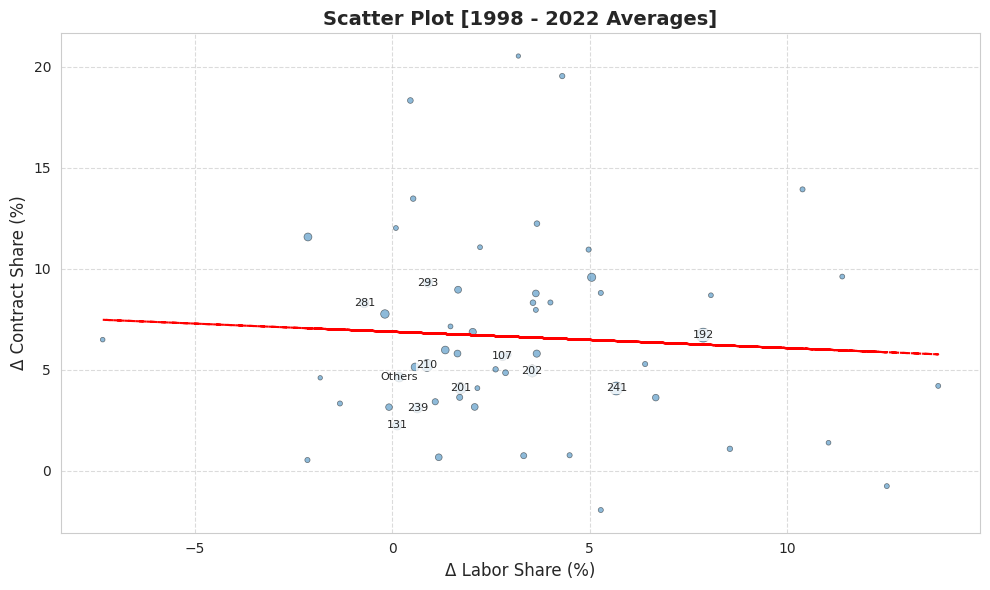

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

avg_by_ind_code_filtered = avg_by_ind_code[(avg_by_ind_code['delta_ls_pct'] < 25) & (avg_by_ind_code['delta_ls_pct'] > -30) &
                                         (avg_by_ind_code['delta_cs_pct'] < 25) & (avg_by_ind_code['delta_cs_pct'] > -30)]

# Calculate regression line
x = avg_by_ind_code_filtered['delta_ls_pct']
y = avg_by_ind_code_filtered['delta_cs_pct']
coefficients = np.polyfit(x, y, 1)
regression_line = np.polyval(coefficients, x)

sns.set_style("whitegrid")  # Use a clean style with a white background and gridlines

plt.figure(figsize=(10, 6))
sizes = (avg_by_ind_code_filtered['Net Value Added'] - avg_by_ind_code_filtered['Net Value Added'].min()) / (
            avg_by_ind_code_filtered['Net Value Added'].max() - avg_by_ind_code_filtered['Net Value Added'].min())
sizes = sizes * 90 + 10
plt.scatter(x, y, s=sizes, alpha=0.5, edgecolors='k', linewidths=0.5)


plt.plot(x, regression_line, color='red', linestyle='--', linewidth=1.5, label='Regression Line')

plt.xlabel('Δ Labor Share (%)', fontsize=12)
plt.ylabel('Δ Contract Share (%)', fontsize=12)
plt.title('Scatter Plot [1998 - 2022 Averages]', fontsize=14, fontweight='bold')

# Customize gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Add labels using annotate with customizations
for i, ind_code in enumerate(avg_by_ind_code_filtered.index):
    if sizes[i] > 40:
        plt.annotate(ind_code, (x[i], y[i]), fontsize=8, ha='center', va='center',
                     bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=0.5))
# plt.legend(fontsize=10)  # Show legend with customized font size

plt.tight_layout()
plt.show()

<ipython-input-75-3d150cb1d13c>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sizes[i] > 40:
<ipython-input-75-3d150cb1d13c>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(ind_code, (x[i], y[i]), fontsize=8, ha='center', va='center',


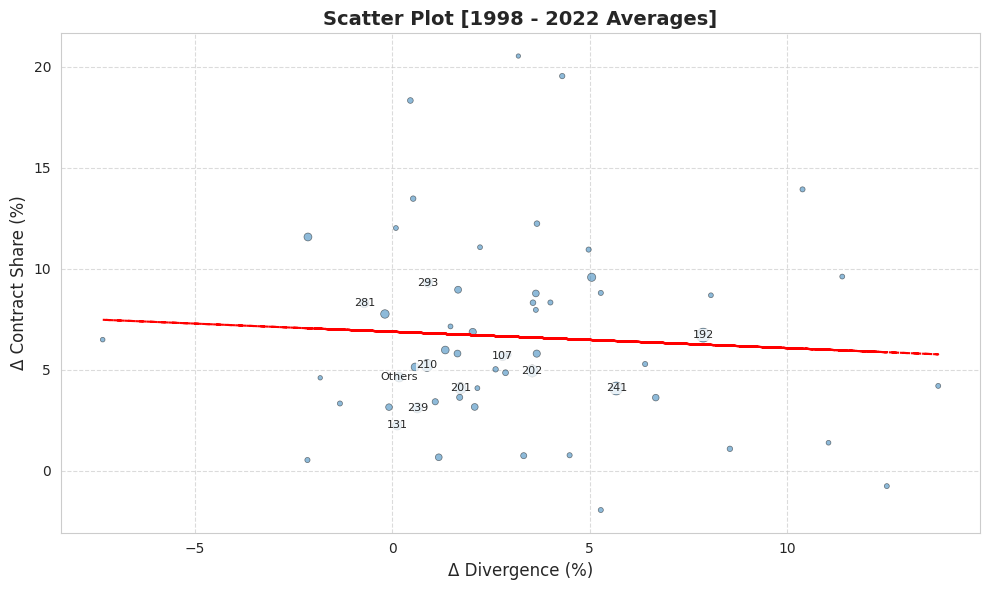

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

avg_by_ind_code_filtered = avg_by_ind_code[(avg_by_ind_code['delta_div_pct'] < 25) & (avg_by_ind_code['delta_div_pct'] > -30) &
                                         (avg_by_ind_code['delta_cs_pct'] < 25) & (avg_by_ind_code['delta_cs_pct'] > -30)]

# Calculate regression line
x = avg_by_ind_code_filtered['delta_div_pct']  # Changed to delta_div_pct
y = avg_by_ind_code_filtered['delta_cs_pct']
coefficients = np.polyfit(x, y, 1)
regression_line = np.polyval(coefficients, x)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sizes = (avg_by_ind_code_filtered['Net Value Added'] - avg_by_ind_code_filtered['Net Value Added'].min()) / (
            avg_by_ind_code_filtered['Net Value Added'].max() - avg_by_ind_code_filtered['Net Value Added'].min())
sizes = sizes * 90 + 10
plt.scatter(x, y, s=sizes, alpha=0.5, edgecolors='k', linewidths=0.5)

plt.plot(x, regression_line, color='red', linestyle='--', linewidth=1.5, label='Regression Line')

plt.xlabel('Δ Divergence (%)', fontsize=12)  # Changed label
plt.ylabel('Δ Contract Share (%)', fontsize=12)
plt.title('Scatter Plot [1998 - 2022 Averages]', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.7)

for i, ind_code in enumerate(avg_by_ind_code_filtered.index):
    if sizes[i] > 40:
        plt.annotate(ind_code, (x[i], y[i]), fontsize=8, ha='center', va='center',
                     bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=0.5))

plt.tight_layout()
plt.show()